In [77]:
import pandas as pd
import numpy as np
import collections
import re
import operator #
import matplotlib.pyplot as plt
from itertools import islice
from dateutil.parser import parse
import datetime
%matplotlib inline

In [3]:
#Load the dataset
data = pd.read_csv("/Users/Rohit/Desktop/Data/test.txt", sep="\t")
data.shape

(3614506, 5)

In [4]:
data[data.AnonID==479].head()

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com


In [5]:
userlist = data.AnonID.unique()
len(userlist) #No of unique users

66000

In [6]:
querylist = data.Query.unique()
len(querylist)

# fig.savefig('asdf.png')

1244496

In [7]:
queries = data.Query
faq = pd.DataFrame({'Query': queries.value_counts().index, 'Count':queries.value_counts()})
faq.index = range(faq.shape[0])
faq

,Count,Query
0,98554,-
1,32396,google
2,13344,yahoo
3,12949,ebay
4,8733,yahoo.com
5,8680,mapquest
6,8139,google.com
7,7653,myspace
8,7099,myspace.com
9,4255,www.google.com


In [8]:
toomany = data[data.ItemRank >5.0]
initial = data[data.ItemRank<=5.0]

oftenAsked = set(initial.Query) & set(toomany.Query)
stillTrying= toomany.loc[toomany['Query'].isin(oftenAsked)]

In [9]:
st = stillTrying.groupby(['Query'])['ItemRank'].max()
mostAttempts = st.to_frame()
mostAttempts['Queries'] = list(mostAttempts.index)

In [10]:
mostAttempts = mostAttempts.reset_index(drop=True)
mostAttempts.head()

,ItemRank,Queries
0,9.0,''smith sisters murdered anonymously'
1,6.0,'32 deuce coupe to buy
2,6.0,'ac dc adaptors'
3,8.0,'aiwa 230v tv vcr'
4,8.0,'bbq parts'


In [79]:
def timeOfDay(date):
    #dt = parse(date)
    if date.hour < 12:
        return "1Morning"
    if date.hour>= 12 and date.hour <= 15:
        return "2Afternoon"
    if date.hour> 15 and date.hour < 21:
        return "3Evening"
    else:
        return "4Night"

In [80]:
timedf = data[["AnonID", "QueryTime"]]
timedf.head()
timedf['QueryDate'] = pd.to_datetime(timedf['QueryTime']).apply(lambda x: x.date())
timedf['QueryTimeStamp'] = pd.to_datetime(timedf['QueryTime']).apply(lambda x: x.time())
timedf['TOD'] = timedf['QueryTimeStamp'].apply(lambda x: timeOfDay(x))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [81]:
timedf.head()
durationmax = timedf.groupby(['AnonID'])['QueryTimeStamp'].max()
durationmin = timedf.groupby(['AnonID'])['QueryTimeStamp'].min()

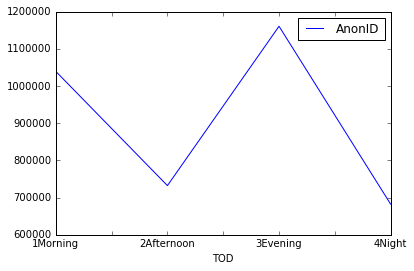

In [82]:
timing = timedf.groupby(['TOD'])['AnonID'].count().to_frame()
timing.plot()
# import matplotlib.pyplot as plt; plt.rcdefaults()
 
# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
# y_pos = np.arange(len(objects))
# performance = [10,8,6,4,2,1]
 
# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')
 
# plt.show()

In [102]:
from datetime import datetime, date
def time2date(x):
    return datetime.combine(date.today(), x) 

In [109]:
dmax = durationmax.to_frame()
dmin = durationmin.to_frame()
dmin['AnonID'] = list(dmin.index)
dmax['AnonID'] = list(dmax.index)
dmin = dmin.reset_index(drop=True)
dmax = dmax.reset_index(drop=True)
duration = pd.merge(dmax, dmin, on='AnonID', how='inner')
duration = duration.rename(columns={'QueryTimeStamp_x': 'MaxTime', 'QueryTimeStamp_y': 'MinTime'})
dulist = duration['MaxTime'].apply(time2date) - duration['MinTime'].apply(time2date)
duration['TimeSpent'] = dulist
duration = duration[['AnonID','TimeSpent']]
duration.TimeSpent.describe()

count                     66000
mean     0 days 12:10:13.667636
std      0 days 08:22:37.873122
min             0 days 00:00:00
25%             0 days 04:41:26
50%      0 days 12:15:41.500000
75%      0 days 21:03:37.250000
max             0 days 23:59:59
Name: TimeSpent, dtype: object

In [88]:
#Satisfaction Levels
def numRanks(df):
    x =df[df.ItemRank<=2.0].ItemRank.count()/df.Query.count() 
    return x

In [89]:
numRanks(userDict[479])

0.4065040650406504

In [80]:
userDict= {}
for user in userlist:
    userDict[user]= data[data.AnonID==user]

In [102]:
userUsage={}
singleUser=0
for user in userDict.keys():
    if numRanks(userDict[user])>0.8:
        if userDict[user].shape[0]==1:
            singleUser= singleUser+1
        userUsage[user]=numRanks(userDict[user])

In [98]:
len(userUsage)

2136

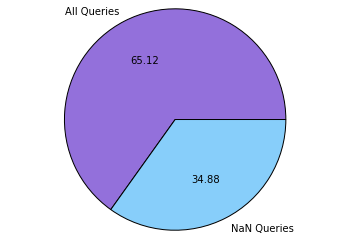

In [177]:
cleandata = data.dropna()
plt.figure()
values1 = [data.shape[0]/data.shape[0],cleandata.shape[0]/data.shape[0]] 
labels1 = ['All Queries', 'NaN Queries'] 
colors1 = ['mediumpurple','lightskyblue'] 
plt.pie(values1, labels=labels1, autopct='%.2f', colors=colors1)
plt.axis('equal')
plt.savefig('NaNQueries.png')
plt.show()

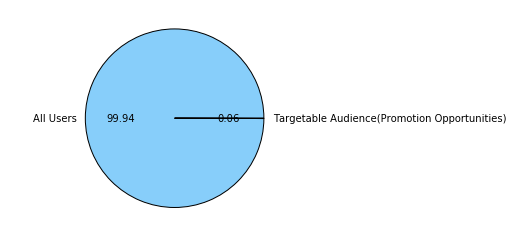

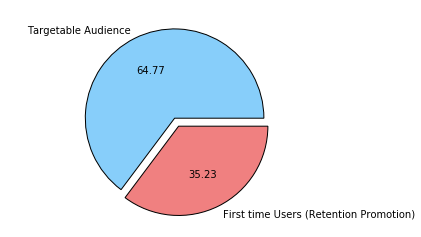

In [176]:
plt.figure()
values1 = [(data.shape[0]/data.shape[0]),(len(userUsage)/data.shape[0])] 
labels1 = ['All Users', 'Targetable Audience(Promotion Opportunities)'] 
colors1 = ['lightskyblue', 'lightcoral'] 
plt.axis('equal')
plt.pie(values1, labels=labels1, autopct='%.2f', colors=colors1)
plt.savefig('TargetAudience.png')
plt.show()
values2 = [(len(userUsage)/len(userUsage)), (singleUser/len(userUsage))] 
labels2 = ['Targetable Audience', 'First time Users (Retention Promotion)'] 
colors2= ['yellowgreen', 'mediumpurple']
plt.axis('equal')
explode1 = (0, 0.1)
plt.pie(values2, labels=labels2, autopct='%.2f', explode=explode1, colors=colors1)
plt.savefig('RententionPlans.png')
plt.show()